import the libraries

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten 
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

image augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set',target_size=(128,128),class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


add layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [7]:
model=Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [13]:
model.add(Dense(9,activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
len(x_train)

475

In [16]:
1238/24

51.583333333333336

fit the model

In [17]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 3275s 7s/step - loss: 1.4156 - accuracy: 0.6092 - val_loss: 0.8031 - val_accuracy: 0.7178
Epoch 2/10
475/475 [==============================] - 375s 789ms/step - loss: 0.5598 - accuracy: 0.8004 - val_loss: 0.5123 - val_accuracy: 0.8150
Epoch 3/10
475/475 [==============================] - 362s 762ms/step - loss: 0.4634 - accuracy: 0.8402 - val_loss: 0.3696 - val_accuracy: 0.8718
Epoch 4/10
475/475 [==============================] - 364s 765ms/step - loss: 0.3832 - accuracy: 0.8669 - val_loss: 0.2470 - val_accuracy: 0.9183
Epoch 5/10
475/475 [==============================] - 364s 765ms/step - loss: 0.3210 - accuracy: 0.8873 - val_loss: 0.3565 - val_accuracy: 0.8741
Epoch 6/10
475/475 [==============================] - 360s 758ms/step - loss: 0.2831 - accuracy: 0.9040 - val_loss: 0.4657 - val_accuracy: 0.8352
Epoch 7/10
475/475 [==============================] - 371s 781ms/step - loss: 0.2453 - accuracy: 0.9135 - val_loss: 0.1700 - v

save the model

In [19]:
model.save('vegetabledata.h5')

test the model

In [23]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('vegetabledata.h5')

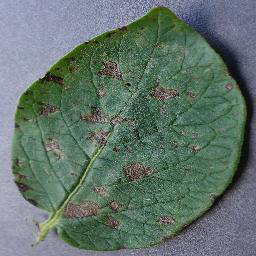

In [26]:
img=image.load_img(r"/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b7883606-5157-4dc1-b965-fc10f8fe1796___RS_Early.B 7598.JPG")
img

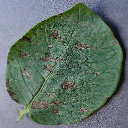

In [27]:
x=image.img_to_array(img)
img=image.load_img(r"/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b7883606-5157-4dc1-b965-fc10f8fe1796___RS_Early.B 7598.JPG",target_size=(128,128))
img

In [28]:
x=image.img_to_array(img)
x

array([[[156., 163., 191.],
        [158., 165., 193.],
        [155., 162., 190.],
        ...,
        [109., 113., 140.],
        [109., 113., 140.],
        [113., 117., 144.]],

       [[166., 173., 201.],
        [166., 173., 201.],
        [159., 166., 194.],
        ...,
        [110., 114., 141.],
        [104., 108., 135.],
        [109., 113., 140.]],

       [[168., 175., 203.],
        [160., 167., 195.],
        [152., 159., 187.],
        ...,
        [110., 114., 141.],
        [101., 105., 132.],
        [110., 114., 141.]],

       ...,

       [[160., 161., 181.],
        [162., 163., 183.],
        [155., 156., 176.],
        ...,
        [103., 101., 122.],
        [ 99.,  97., 118.],
        [105., 103., 124.]],

       [[155., 156., 176.],
        [150., 151., 171.],
        [152., 153., 173.],
        ...,
        [109., 107., 128.],
        [102., 100., 121.],
        [107., 105., 126.]],

       [[157., 158., 178.],
        [156., 157., 177.],
        [149., 1

In [29]:
x=np.expand_dims(x,axis=0)

In [30]:
x

array([[[[156., 163., 191.],
         [158., 165., 193.],
         [155., 162., 190.],
         ...,
         [109., 113., 140.],
         [109., 113., 140.],
         [113., 117., 144.]],

        [[166., 173., 201.],
         [166., 173., 201.],
         [159., 166., 194.],
         ...,
         [110., 114., 141.],
         [104., 108., 135.],
         [109., 113., 140.]],

        [[168., 175., 203.],
         [160., 167., 195.],
         [152., 159., 187.],
         ...,
         [110., 114., 141.],
         [101., 105., 132.],
         [110., 114., 141.]],

        ...,

        [[160., 161., 181.],
         [162., 163., 183.],
         [155., 156., 176.],
         ...,
         [103., 101., 122.],
         [ 99.,  97., 118.],
         [105., 103., 124.]],

        [[155., 156., 176.],
         [150., 151., 171.],
         [152., 153., 173.],
         ...,
         [109., 107., 128.],
         [102., 100., 121.],
         [107., 105., 126.]],

        [[157., 158., 178.],
       

In [31]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 208ms/step


In [32]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [35]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [36]:
index[y[0]]

'Potato___Early_blight'

In [37]:
img=image.load_img(r"/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b7883606-5157-4dc1-b965-fc10f8fe1796___RS_Early.B 7598.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 60ms/step


'Potato___Early_blight'